In [28]:
#Importing Important Libraries

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
# Reading CSV File
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.size

2709

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [9]:
# Checking For Null Values 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [33]:
# Changing Dtypes of Few columns 
df["Selling_Price"] = df["Selling_Price"].astype(float)
df["Present_Price"] = df["Present_Price"].astype(float)

In [56]:
# Dropping The Useless Column
df.drop("Car_Names",axis=1,inplace=True)

# Encoding the Columns

columns_to_encode = ["Fuel_Type","Seller_Type","Transmission"]

label_encode = {}
for col in columns_to_encode:
    label_encode[col] = LabelEncoder()
    df[col] = label_encode[col].fit_transform(df[col])

# Detecting Outliers 

num_cols = ["Selling_Price","Present_Price","Kms_Driven","Owner"]

outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

In [57]:
# Splitting The Data into trainig and testing 
x = df.drop("Selling_Price",axis=1)
y = df["Selling_Price"]

x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.1,random_state=2)

In [58]:
# Training The Model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [59]:
# Predicting The Model 

pred = model.predict(x_test)
pred

array([ 9.96009771,  0.28791475,  3.70484558,  4.10696178,  9.35200397,
        3.85358485,  6.33101808,  6.76822332, -0.09941289,  4.64857173,
        6.02858979,  5.398628  ,  1.82537983,  7.31409467,  1.49381105,
        1.25026481,  1.57738846,  1.54905718,  8.73872985,  3.66310261,
        1.28738661,  8.81572403,  1.15464671,  9.18397427,  0.39415708,
        7.57241469,  1.11214978, -3.53887595,  3.81646305,  1.86070123,
        3.13610201])

In [60]:
print("R2 Score of the Model is :", r2_score(y_test, pred))
print("MAE of Model is :", mean_absolute_error(y_test, pred))
print("RMSE of Model is :", np.sqrt(mean_squared_error(y_test, pred)))

R2 Score of the Model is : 0.8182956577843804
MAE of Model is : 1.1676592489514097
RMSE of Model is : 1.5458243162711718


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

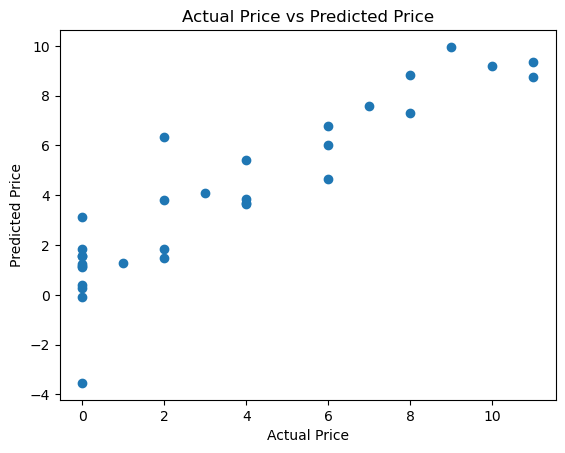

In [61]:
plt.scatter(y_test,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

In [62]:
# Trained Data 
pred = model.predict(x_train)
pred

array([ 3.30318867e+00,  5.11381041e+00,  7.33690136e+00, -2.31228115e+00,
        6.29802348e+00,  7.71191405e+00,  5.54732513e+00,  5.96645927e+00,
        5.74070812e+00,  1.56236763e+01,  1.63405104e+00,  7.53153430e-01,
       -5.23071505e-01,  6.01562746e+00,  6.41560896e+00,  5.78916007e-01,
        6.32635477e+00,  1.41561081e+01,  2.32812812e+00,  7.52991776e+00,
       -1.34638968e+00,  8.58481843e+00,  7.24822142e-01,  1.64609184e+00,
       -1.28487185e+00,  3.53784993e-01,  9.54713505e+00, -9.23647926e-01,
       -2.73502290e+00,  9.73557080e+00,  6.41461737e+00,  8.30988815e-01,
        3.84829643e+00, -4.44243599e-01,  3.18352781e+00,  2.33822822e+00,
        1.17497832e+00,  2.65749418e-01,  1.20422647e+00,  6.89408031e-01,
        3.75429076e+00,  5.52615030e+00,  4.41509258e-01,  6.30659648e-01,
        5.41668919e+00,  3.13397717e+00,  2.06933329e+00,  7.07976532e+00,
        4.25941036e+00,  4.16705990e+00,  3.80886638e+00,  2.29765464e+00,
        3.84412537e+00,  

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

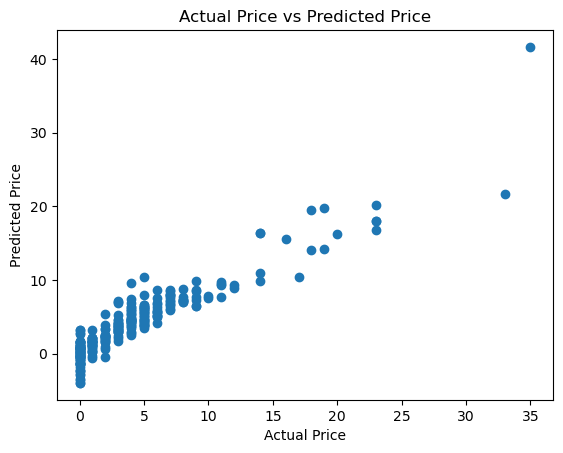

In [63]:
plt.scatter(y_train,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")